## Download the dataset - from Kaggle

Skip this step if you have the data in Drive already!

In [ ]:
!pip install -q kaggle

In [ ]:
from google.colab import files
files.upload()

KeyboardInterrupt: 

In [ ]:
! mkdir ~/.kaggle
! cp kaggle.json ~/.kaggle/

In [ ]:
! chmod 600 ~/.kaggle/kaggle.json

In [ ]:
! kaggle datasets list

ref                                                  title                                    size  lastUpdated          downloadCount  voteCount  usabilityRating  
---------------------------------------------------  --------------------------------------  -----  -------------------  -------------  ---------  ---------------  
syedanwarafridi/vehicle-sales-data                   Vehicle Sales Data                       19MB  2024-02-21 20:16:17           9790        176  1.0              
arnavvvvv/spotify-music                              Top Spotify Songs                        47KB  2024-03-06 05:20:29           1618         35  1.0              
tarunrm09/climate-change-indicators                  Climate change Indicators                34KB  2024-02-22 08:53:54           5094        113  1.0              
arnavvvvv/netflix-movies-and-tv-shows                Netflix Movies and TV Shows               1MB  2024-03-04 15:49:29           1885         45  1.0              
zain280/da

In [ ]:
! kaggle competitions download -c bgu-recommendation-systems-click-through-rate

  5% 584M/11.7G [00:05<01:51, 107MB/s]
User cancelled operation


In [ ]:
import zipfile
import os

zip_file_path = 'bgu-recommendation-systems-click-through-rate.zip'
extracted_folder_path = 'bgu-recommendation-systems-click-through-rate'

# Create the extraction directory if it doesn't exist
os.makedirs(extracted_folder_path, exist_ok=True)

# Open the zip file and extract its contents
with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
    zip_ref.extractall(extracted_folder_path)

print(f"Successfully extracted contents to {extracted_folder_path}")

## Download the dataset - from Drive

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import os
import pandas as pd
from tqdm import tqdm

parent_dir = '/content/drive/MyDrive/cs247project/data/train_data'

# Initialize an empty DataFrame to store the combined data
df = pd.DataFrame()

# Iterate through each folder (train1 through train7)
for folder_name in os.listdir(parent_dir):
    folder_path = os.path.join(parent_dir, folder_name)

    # Check if the path is a directory
    if os.path.isdir(folder_path):
        # Iterate through each CSV file in the folder
        for file_name in tqdm(os.listdir(folder_path), desc=f"Processing {folder_name}"):
            if file_name.endswith('.csv'):
                file_path = os.path.join(folder_path, file_name)

                # Read the CSV file into a DataFrame
                this_df = pd.read_csv(file_path)

                # Concatenate the current DataFrame with the combined_data DataFrame
                df = pd.concat([df, this_df], ignore_index=True)

# Print the combined DataFrame
print(df)


Processing train1:  18%|█▊        | 2/11 [00:19<01:27,  9.73s/it]


ParserError: Error tokenizing data. C error: Calling read(nbytes) on source failed. Try engine='python'.

In [2]:
import pandas as pd
df = pd.DataFrame()
df = pd.read_csv("/content/drive/MyDrive/cs247project/data/trimmed-data-threshold-1.csv")

In [3]:
print(df.shape)

(1633619, 23)


In [5]:
df = df.dropna()
user_counts = df['user_id_hash'].value_counts()
print(len(user_counts[user_counts > 1].index))

users_to_keep = user_counts[user_counts > 1].index

trimmed_df = df[df['user_id_hash'].isin(users_to_keep)]
trimmed_df.to_csv('trimmed_data.csv', index=False)

242298


In [6]:
df = pd.read_csv('trimmed_data.csv')

In [7]:
print(df.shape)

(562914, 23)


In [11]:
df = pd.read_csv("/content/drive/MyDrive/cs247project/data/train_data/train1/part-00000.csv")
df = df.dropna()

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
sns.set(color_codes=True)

## Get basic info about features

In [ ]:
df.head(5)

,page_view_start_time,user_id_hash,target_id_hash,syndicator_id_hash,campaign_id_hash,empiric_calibrated_recs,empiric_clicks,target_item_taxonomy,placement_id_hash,user_recs,...,source_id_hash,source_item_type,browser_platform,os_family,country_code,region,day_of_week,time_of_day,gmt_offset,is_click
0,1586392478339,939e2ccfb21e0ec9b0787c394dea1ae935369da0bcc597...,7349cb051df9c68532a2e4816aa1dc074141a7ce4a1236...,ebc206ae45aa38e5ffafafb3a91dc289d4a0838937c728...,df4a08d5f84793cb72cb0bfdb50e82a7f6ce6cae5701d7...,13107.24400,24312.0,UNKNOWN,2a1989e08355c7e9539e9b9a01c9a7f7869d75bf071b9b...,73.0,...,ec15d7e4d8e2717a592d339ce79beef7249bfc598278b8...,text,PHON,2,US,FL,3,20,-400,1.0
1,1587264330576,decc9bcd3a7f2807721a35368b362782ec5bf4b4fb7ecf...,415462704d29d1d343c78d2bb466402adc222f0969d5a9...,85d3c3f9981f84f4d10d01a9115962b99e00ef325ef20d...,076a73951276d40a877a8fc065cfbdd1cc4af5685d63c7...,129166.30000,103160.0,BUSINESS,94a75567cd09d67c3f74d15ee8d82dea79030a5f30a0f4...,43.0,...,389b69708cf58731e78e2e023a8c608d886fe5aebc0e23...,category,DESK,6,US,TX,6,21,-500,0.0
2,1586971453279,30b6851a72026b837c7b33190ec7684763f36a8cd7722c...,1487501fb59aa7bfdc8744fc839e30cf115d9dbdb9fe5c...,56657dd10b5a8391d470928f5f92192df442ec7b927bf3...,e90bf004fa3fd9ac170c239e425dbfedbef0453b93a5dd...,16507.39600,17779.0,ENTERTAINMENT~MUSIC,932fbd7955800fd5a36f071a7e74f18343c263cf4bd950...,61.0,...,afd2bead96464ae13fb61ba573ea503355865336dac9bf...,photo,PHON,2,US,TX,3,12,-500,1.0
3,1586446676383,0b03f7d7bfc9d81e55ebeb994d572ca65cca353e7aaf85...,8058abb5518bb536d98c395013fb9081368ed89cca5980...,daaee2d38f21a75a08d375e55802b3fdfc03cf21608ebd...,1633f7f86d0b74925000ec3ccb2662ae6e41a0de72669b...,965.36127,5513.0,LIFE~HEALTH,3e169c2c7c217891ced33c35c10f01ba9b1a830e58ff24...,357.0,...,12811e3e09990653423da6481b0a67215096ff5bbd2fba...,text,DESK,6,US,FL,4,11,-400,0.0
4,1587072791703,b46cb1c9681e58c0a09b88b82c36913cbf3f710674eb39...,d69f8bbef63a1c87fd253bfe1354894c06b194a2e6c30c...,2f216e3448659404205a319e9cada63f967871b2c3e0d5...,8171fbc15cbd58ba2a41db9445a84423ccff42cf91f035...,4976.14800,1974.0,BUSINESS,6207a672a60f19e0225b1ce438bfc5138af3f549787baa...,825.0,...,5e7a6ed11cdc1472ea91031bc66078c8ecd5283e2863d2...,text,DESK,6,US,CO,4,15,-600,0.0


In [ ]:
df.dtypes

page_view_start_time         int64
user_id_hash                object
target_id_hash              object
syndicator_id_hash          object
campaign_id_hash            object
empiric_calibrated_recs    float64
empiric_clicks             float64
target_item_taxonomy        object
placement_id_hash           object
user_recs                  float64
user_clicks                float64
user_target_recs           float64
publisher_id_hash           object
source_id_hash              object
source_item_type            object
browser_platform            object
os_family                    int64
country_code                object
region                      object
day_of_week                  int64
time_of_day                  int64
gmt_offset                   int64
is_click                   float64
dtype: object

In [ ]:
df.shape

(462734, 23)

In [ ]:
df.count()

page_view_start_time       462734
user_id_hash               462734
target_id_hash             462734
syndicator_id_hash         462734
campaign_id_hash           462734
empiric_calibrated_recs    462734
empiric_clicks             462734
target_item_taxonomy       462734
placement_id_hash          462734
user_recs                  462734
user_clicks                462734
user_target_recs           462734
publisher_id_hash          462734
source_id_hash             462734
source_item_type           462734
browser_platform           462734
os_family                  462734
country_code               462727
region                     462724
day_of_week                462734
time_of_day                462734
gmt_offset                 462734
is_click                   462734
dtype: int64

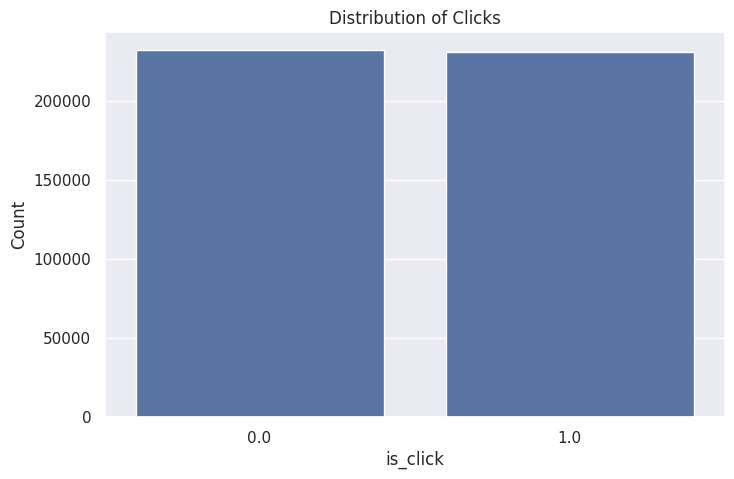

In [ ]:
# Visualize is_click, make sure the classes are balanced
plt.figure(figsize=(8, 5))
sns.countplot(x='is_click', data=df)
plt.title('Distribution of Clicks')
plt.xlabel('is_click')
plt.ylabel('Count')
plt.show()

## Remove null values

In [ ]:
print(df.isnull().sum())

page_view_start_time        0
user_id_hash                0
target_id_hash              0
syndicator_id_hash          0
campaign_id_hash            0
empiric_calibrated_recs     0
empiric_clicks              0
target_item_taxonomy        0
placement_id_hash           0
user_recs                   0
user_clicks                 0
user_target_recs            0
publisher_id_hash           0
source_id_hash              0
source_item_type            0
browser_platform            0
os_family                   0
country_code                7
region                     10
day_of_week                 0
time_of_day                 0
gmt_offset                  0
is_click                    0
dtype: int64


In [98]:
df = df.dropna()    # Dropping the missing values.
df.count()

page_view_start_time       1633576
user_id_hash               1633576
target_id_hash             1633576
syndicator_id_hash         1633576
campaign_id_hash           1633576
empiric_calibrated_recs    1633576
empiric_clicks             1633576
target_item_taxonomy       1633576
placement_id_hash          1633576
user_recs                  1633576
user_clicks                1633576
user_target_recs           1633576
publisher_id_hash          1633576
source_id_hash             1633576
source_item_type           1633576
browser_platform           1633576
os_family                  1633576
country_code               1633576
region                     1633576
day_of_week                1633576
time_of_day                1633576
gmt_offset                 1633576
is_click                   1633576
dtype: int64

In [ ]:
print(df.isnull().sum())

page_view_start_time       0
user_id_hash               0
target_id_hash             0
syndicator_id_hash         0
campaign_id_hash           0
empiric_calibrated_recs    0
empiric_clicks             0
target_item_taxonomy       0
placement_id_hash          0
user_recs                  0
user_clicks                0
user_target_recs           0
publisher_id_hash          0
source_id_hash             0
source_item_type           0
browser_platform           0
os_family                  0
country_code               0
region                     0
day_of_week                0
time_of_day                0
gmt_offset                 0
is_click                   0
dtype: int64


## Check for outliers

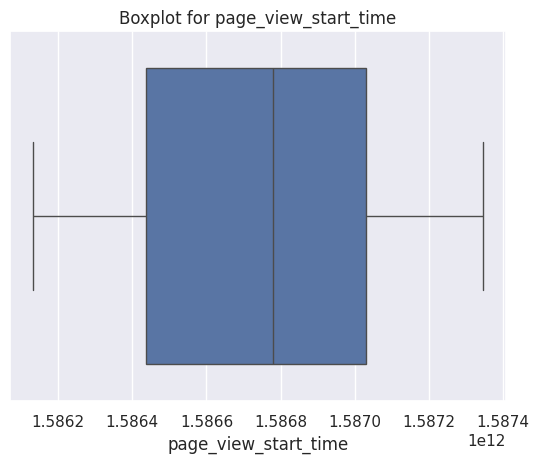

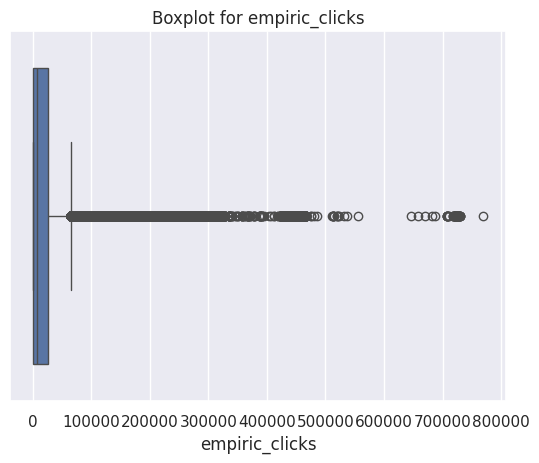

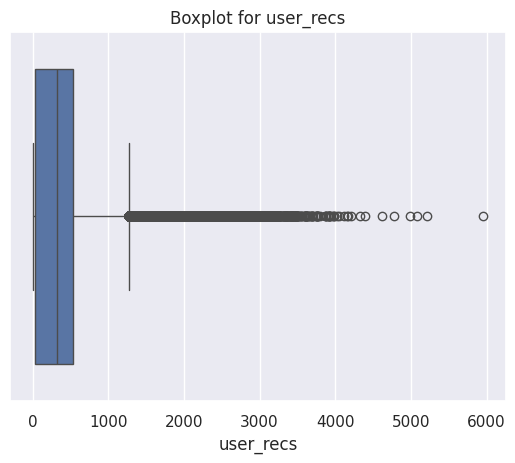

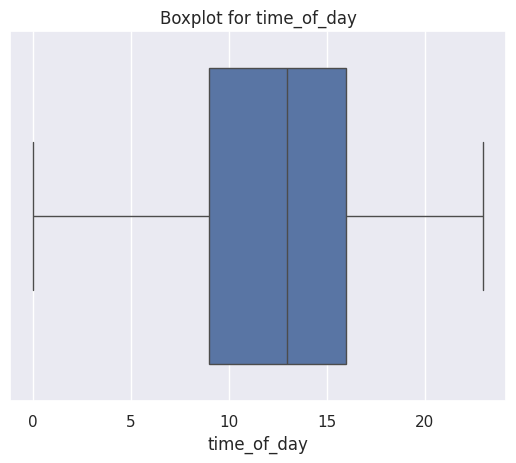

In [ ]:
cols = ['page_view_start_time', 'empiric_clicks', 'user_recs', 'time_of_day'] # can add/remove from this as needed

for col in cols:
      # Create a boxplot for the current column
      sns.boxplot(x=df[col])

      # Set plot title with the column name
      plt.title(f'Boxplot for {col}')

      # Show the plot
      plt.show()

In [ ]:
unique_user_ids = df['user_id_hash'].nunique()
print(unique_user_ids)
unique_target_ids = df['target_id_hash'].nunique()
print(unique_target_ids)

450002
28270


## Identify most important features:

In [112]:
from sklearn.ensemble import RandomForestClassifier

numeric_features = df.select_dtypes(include=['int64', 'float64']).columns.tolist()
df_numeric_features_only = df.loc[:, numeric_features]

X = df_numeric_features_only.drop('is_click', axis=1)
y = df_numeric_features_only['is_click']

# Create and train the RandomForestClassifier
model = RandomForestClassifier(random_state=42)
model.fit(X, y)

# Get feature importances
feature_importances = model.feature_importances_

# Combine with feature names
feature_importance_dict = dict(zip(X.columns, feature_importances))

# Sort and display
sorted_features = sorted(feature_importance_dict.items(), key=lambda x: x[1], reverse=True)
print(sorted_features)



[('empiric_calibrated_recs', 0.19068366652922578), ('empiric_clicks', 0.17948616223016203), ('user_recs', 0.14502616070142577), ('user_clicks', 0.14141725053784754), ('page_view_start_time', 0.1251862775324366), ('time_of_day', 0.07906487214912496), ('user_target_recs', 0.056920294250776174), ('gmt_offset', 0.03516578526592981), ('day_of_week', 0.03403680036352144), ('os_family', 0.013012730439550004)]


In [25]:
# Plot the two most important features
plt.figure(figsize=(10, 6))

# Scatter plot with custom colors based on is_click
colors = df['is_click'].map({0: 'red', 1: 'green'})
plt.scatter(df['empiric_calibrated_recs'], df['empiric_clicks'], c=colors)

# Adding labels and title
plt.title('Scatter Plot: empiric_calibrated_recs vs empiric_clicks')
plt.xlabel('empiric_calibrated_recs')
plt.ylabel('empiric_clicks')

plt.show()

NameError: name 'plt' is not defined

In [ ]:
# Plot the some of the less important features
plt.figure(figsize=(10, 6))

# Scatter plot with custom colors based on is_click
colors = df['is_click'].map({0: 'red', 1: 'green'})
plt.scatter(df['user_target_recs'], df['user_recs'], c=colors)

# Adding labels and title
plt.title('Scatter Plot: user_target_recs vs user_recs')
plt.xlabel('user_target_recs')
plt.ylabel('user_recs')

plt.show()


In [ ]:
# https://www.kaggle.com/code/imoore/intro-to-exploratory-data-analysis-eda-in-python

## Baseline Classifiers

In [113]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# All our baselines only use the numerical features in the dataset
X = df_numeric_features_only.drop('is_click', axis=1)  # Features
y = df_numeric_features_only['is_click']  # Target variable

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### Logistic Regression

In [114]:
from sklearn.linear_model import LogisticRegression

# Create a Logistic Regression model
model = LogisticRegression(random_state=42)

# Train the model on the training set
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)

print(f"Accuracy: {accuracy:.2f}")

Accuracy: 0.60


### Decision Tree

In [115]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn import tree

# Create a decision tree classifier
clf = DecisionTreeClassifier(random_state=42)

# Train the classifier on the training set
clf.fit(X_train, y_train)

# Make predictions on the test set
y_pred = clf.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)

print(f"Accuracy: {accuracy:.2f}")

Accuracy: 0.65


### Random Forest

In [116]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

# Create a Random Forest classifier
clf = RandomForestClassifier(random_state=42)

# Train the classifier on the training set
clf.fit(X_train, y_train)

# Make predictions on the test set
y_pred = clf.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)

print(f"Accuracy: {accuracy:.2f}")


Accuracy: 0.74


### Perceptron

In [117]:
import tensorflow as tf
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import StandardScaler

# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Define one-layer neural network
model = tf.keras.Sequential([
    tf.keras.layers.Dense(1, activation='sigmoid', input_shape=(X_train_scaled.shape[1],))
])

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
model.fit(X_train_scaled, y_train, epochs=10, batch_size=32, validation_data=(X_test_scaled, y_test))

# Evaluate the model
y_pred_probs = model.predict(X_test_scaled)
y_pred = (y_pred_probs > 0.5).astype(int)

accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

print(f"Accuracy: {accuracy:.2f}")
print("Confusion Matrix:\n", conf_matrix)
print("Classification Report:\n", classification_rep)


Epoch 1/10
14073/14073 [==============================] - 53s 4ms/step - loss: 0.6066 - accuracy: 0.6862 - val_loss: 0.6055 - val_accuracy: 0.6899
Epoch 2/10
14073/14073 [==============================] - 52s 4ms/step - loss: 0.6036 - accuracy: 0.6907 - val_loss: 0.6054 - val_accuracy: 0.6886
Epoch 3/10
14073/14073 [==============================] - 51s 4ms/step - loss: 0.6036 - accuracy: 0.6903 - val_loss: 0.6056 - val_accuracy: 0.6897
Epoch 4/10
14073/14073 [==============================] - 48s 3ms/step - loss: 0.6036 - accuracy: 0.6905 - val_loss: 0.6054 - val_accuracy: 0.6893
Epoch 5/10
14073/14073 [==============================] - 51s 4ms/step - loss: 0.6036 - accuracy: 0.6905 - val_loss: 0.6056 - val_accuracy: 0.6879
Epoch 6/10
14073/14073 [==============================] - 51s 4ms/step - loss: 0.6036 - accuracy: 0.6905 - val_loss: 0.6053 - val_accuracy: 0.6875
Epoch 7/10
14073/14073 [==============================] - 48s 3ms/step - loss: 0.6036 - accuracy: 0.6904 - val_loss: 0

## Model-Based Collaborative Filtering

In [12]:
import torch
from torch.utils.data import Dataset, DataLoader

class CTRDataset(Dataset):
    def __init__(self, dataframe):
        self.data = dataframe

        # Encode categorical columns
        self.item_features = dataframe[["syndicator_id_hash", "campaign_id_hash", "empiric_calibrated_recs", "empiric_clicks",
                                        "target_item_taxonomy", "placement_id_hash"]]
        self.user_features = dataframe[["user_target_recs", "user_recs", "user_clicks"]]
        self.context_features = dataframe[["source_id_hash", "source_item_type", "browser_platform", "region", "time_of_day", "gmt_offset", "day_of_week", "os_family"]]
        self.labels = dataframe["is_click"]

    def __len__(self):
        return len(self.data)

    def __getitem__(self, idx):
        user_id = torch.tensor([self.data.iloc[idx]['user_id_hash']], dtype=torch.int)
        item_id = torch.tensor([self.data.iloc[idx]['target_id_hash']], dtype=torch.int)
        context_id = torch.tensor([self.data.iloc[idx]['publisher_id_hash']], dtype=torch.int)
        user_features = torch.tensor(self.user_features.iloc[idx].values, dtype=torch.float32)
        item_features = torch.tensor(self.item_features.iloc[idx].values, dtype=torch.float32)
        context_features = torch.tensor(self.context_features.iloc[idx].values, dtype=torch.float32)
        label = torch.tensor(self.labels.iloc[idx], dtype=torch.float32)
        return user_id, item_id, context_id, user_features, item_features, context_features, label

In [13]:
import torch
import torch.nn as nn

class NeuralCollaborativeFiltering(nn.Module):
    def __init__(self, num_users, num_items, num_contexts, num_user_features=3, num_item_features=6, num_context_features=8, embedding_size=30, hidden_size=80):
        super(NeuralCollaborativeFiltering, self).__init__()

        self.embedding_size = embedding_size
        self.user_embedding = nn.Embedding(num_users, embedding_size)
        self.item_embedding = nn.Embedding(num_items, embedding_size)
        self.context_embedding = nn.Embedding(num_contexts, embedding_size)

        self.fc = nn.Sequential(
            nn.Linear(3 * embedding_size + num_user_features + num_item_features + num_context_features, hidden_size),
            nn.ReLU(),
            nn.Linear(hidden_size, 1),
            nn.Sigmoid()
        )

    def forward(self, user_id, item_id, context_id, user_features, item_features, context_features):
        user_embeds = self.user_embedding(user_id).view(-1, self.embedding_size)
        item_embeds = self.item_embedding(item_id).view(-1, self.embedding_size)
        context_embeds = self.context_embedding(context_id).view(-1, self.embedding_size)

        # Concatenate user and item embeddings
        x = torch.cat([user_embeds, item_embeds, context_embeds, user_features, item_features, context_features], dim=1)

        # Pass through fully connected layers
        output = self.fc(x)

        return output.squeeze()

In [14]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from tqdm import tqdm

model_checkpoint_path = '/content/drive/MyDrive/TestData/model_checkpoint.pth'

clean_df = df
label_encoder = LabelEncoder()
clean_df['target_id_hash'] = label_encoder.fit_transform(clean_df['target_id_hash'])
clean_df['syndicator_id_hash'] = label_encoder.fit_transform(clean_df['syndicator_id_hash'])
clean_df['campaign_id_hash'] = label_encoder.fit_transform(clean_df['campaign_id_hash'])
clean_df['target_item_taxonomy'] = label_encoder.fit_transform(clean_df['target_item_taxonomy'])
clean_df['placement_id_hash'] = label_encoder.fit_transform(clean_df['placement_id_hash'])
clean_df['user_id_hash'] = label_encoder.fit_transform(clean_df['user_id_hash'])
clean_df['publisher_id_hash'] = label_encoder.fit_transform(clean_df['publisher_id_hash'])
clean_df['source_id_hash'] = label_encoder.fit_transform(clean_df['source_id_hash'])
clean_df['source_item_type'] = label_encoder.fit_transform(clean_df['source_item_type'])
clean_df['browser_platform'] = label_encoder.fit_transform(clean_df['browser_platform'])
clean_df['region'] = label_encoder.fit_transform(clean_df['region'])

train_df, test_df = train_test_split(clean_df, test_size=0.2, random_state=0)
train_df, val_df = train_test_split(train_df, test_size=0.2, random_state=0)

train_dataset = CTRDataset(train_df)
val_dataset = CTRDataset(val_df)
test_dataset = CTRDataset(test_df)

batch_size = 64
train_dataloader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
val_dataloader = DataLoader(val_dataset, batch_size=batch_size, shuffle=False)
test_dataloader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)

num_users = clean_df['user_id_hash'].nunique()
num_targets = clean_df['target_id_hash'].nunique()
num_contexts = clean_df['publisher_id_hash'].nunique()

model = NeuralCollaborativeFiltering(num_users, num_targets, num_contexts)
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.to(device)

criterion = nn.BCELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.002, weight_decay=0.001)

num_epochs = 10

for epoch in range(num_epochs):
    model.train()
    with tqdm(total=len(train_dataloader), desc=f'Epoch {epoch + 1}/{num_epochs}') as pbar:
      for user_id, item_id, context_id, user_features, item_features, context_features, target in train_dataloader:

          # Move input data to GPU
          user_id, item_id, context_id, user_features, item_features, context_features, target = (
              user_id.to(device),
              item_id.to(device),
              context_id.to(device),
              user_features.to(device),
              item_features.to(device),
              context_features.to(device),
              target.to(device),
          )

          optimizer.zero_grad()
          output = model(user_id, item_id, context_id, user_features, item_features, context_features)
          loss = criterion(output, target)
          loss.backward()
          optimizer.step()

    # Validation
    model.eval()
    val_loss = 0.0
    with torch.no_grad():
        for user_id, item_id, context_id, user_features, item_features, context_features, target in val_dataloader:
            user_id, item_id, context_id, user_features, item_features, context_features, target = (
                user_id.to(device),
                item_id.to(device),
                context_id.to(device),
                user_features.to(device),
                item_features.to(device),
                context_features.to(device),
                target.to(device),
            )
            output = model(user_id, item_id, context_id, user_features, item_features, context_features)
            val_loss += criterion(output, target)

    print(f'Epoch {epoch + 1}/{num_epochs}, Training Loss: {loss.item()}, Validation Loss: {val_loss.item()}')
    torch.save(model.state_dict(), f'/content/drive/MyDrive/TestData/model_checkpoint_epoch_{epoch + 1}.pth')

# Step 8: Evaluate the model on the test set
model.eval()
test_loss = 0.0
correct_predictions = 0
total_samples = 0

with torch.no_grad():
    for user_id, item_id, context_id, user_features, item_features, context_features, target in test_dataloader:
        user_id, item_id, context_id, user_features, item_features, context_features, target = (
            user_id.to(device),
            item_id.to(device),
            context_id.to(device),
            user_features.to(device),
            item_features.to(device),
            context_features.to(device),
            target.to(device),
        )
        output = model(user_id, item_id, context_id, user_features, item_features, context_features)
        test_loss += criterion(output, target.squeeze())
        predicted_labels = (output >= 0.5).float()
        correct_predictions += (predicted_labels == target).sum().item()
        total_samples += target.size(0)

test_accuracy = correct_predictions / total_samples
print(f'Test Loss: {test_loss.item()}, Test Accuracy: {test_accuracy}')

Epoch 1/10:   0%|          | 0/4628 [02:56<?, ?it/s]


Epoch 1/10, Training Loss: 60.0, Validation Loss: 57895.92578125


Epoch 2/10:   0%|          | 0/4628 [02:54<?, ?it/s]


Epoch 2/10, Training Loss: 30.0, Validation Loss: 48248.6328125


Epoch 3/10:   0%|          | 0/4628 [02:54<?, ?it/s]


Epoch 3/10, Training Loss: 60.0, Validation Loss: 57895.92578125


Epoch 4/10:   0%|          | 0/4628 [02:53<?, ?it/s]


Epoch 4/10, Training Loss: 60.0, Validation Loss: 57895.92578125


Epoch 5/10:   0%|          | 0/4628 [02:54<?, ?it/s]


Epoch 5/10, Training Loss: 50.0, Validation Loss: 57890.26953125


Epoch 6/10:   0%|          | 0/4628 [02:55<?, ?it/s]


Epoch 6/10, Training Loss: 20.0, Validation Loss: 46561.08203125


Epoch 7/10:   0%|          | 0/4628 [02:55<?, ?it/s]


Epoch 7/10, Training Loss: 40.0, Validation Loss: 40226.35546875


Epoch 8/10:   0%|          | 0/4628 [02:55<?, ?it/s]


Epoch 8/10, Training Loss: 40.0, Validation Loss: 37907.14453125


Epoch 9/10:   0%|          | 0/4628 [02:54<?, ?it/s]


Epoch 9/10, Training Loss: 60.0, Validation Loss: 57895.92578125


Epoch 10/10:   0%|          | 0/4628 [02:55<?, ?it/s]


Epoch 10/10, Training Loss: 50.0, Validation Loss: 57895.92578125
Test Loss: 72395.5, Test Accuracy: 0.49933004840940526


In [ ]:
print(clean_df['user_id_hash'].nunique())
print(df.shape)